In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import nanonets
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.optimize import curve_fit
from scipy.special import gamma
plt.style.use(["science","bright","grid"])

cm  = plt.get_cmap('cividis')
ma  = ["o","s","^","v","<",">"]

## DC Input - Voltage Distribution - Closed Circuit

In [5]:
def shift_and_append(dfs_dict):
    for name, df in dfs_dict.items():
        col1 = df.pop("1")  # remove column 1
        df.columns = range(df.shape[1])  # reassign column names to keep them sequential
        df[len(df.columns)] = col1  # append column 1's data at the end
    return dfs_dict

folder1     = "/home/j/j_mens07/phd/data/2_funding_period/current/wo_magic_cable/dc_input_vs_temp/"
folder2     = "/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/dc_input_vs_temp/"
T_vals      = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
N_p         = 10
U_0         = 0.02

N_voltages      = 50000
t_vals          = np.arange(N_voltages-1)*1e-10*1e9
pot_closed      = {T : pd.read_csv(f"{folder1}mean_state_Nx={N_p}_Ny=1_Ne=2_{T:.3f}.csv").round(5) for T in T_vals}
pot_closed      = shift_and_append(pot_closed)
pot_eq_closed   = pd.DataFrame([pot_closed[T].iloc[48000:,:].mean().values / T for T in T_vals],index=T_vals).T.round(2)
pot_open        = {T : pd.read_csv(f"{folder2}mean_state_Nx={N_p}_Ny=1_Ne=2_{T:.3f}.csv").round(5) for T in T_vals}
pot_open        = shift_and_append(pot_open)
pot_eq_open     = pd.DataFrame([pot_open[T].iloc[48000:,:].mean().values / T for T in T_vals],index=T_vals).T.round(2)

## Output Potential

In [4]:
output_c = {T : pd.read_csv(f"{folder1}Nx={N_p}_Ny=1_Ne=2_{T:.3f}.csv").round(5)['Observable'].values for T in T_vals}
output_o = {T : pd.read_csv(f"{folder2}Nx={N_p}_Ny=1_Ne=2_{T:.3f}.csv").round(5)['Observable'].values for T in T_vals}

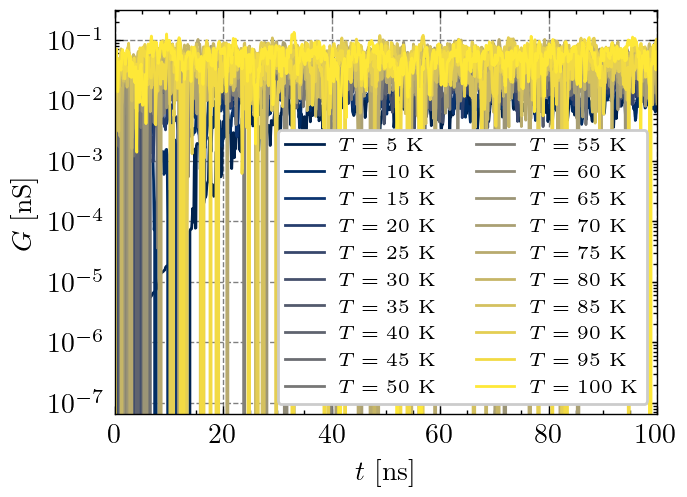

In [ ]:
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
norm    = Normalize(vmin=T_vals[0], vmax=T_vals[-1])
for T in T_vals:
    ax.plot(t_vals, output_c[T]*1e-9/U_0, label=f'$T = {T}$ K', color=cm(norm(T)))
ax.legend(fontsize='x-small', ncol=2)
ax.set_ylabel("$G$ [nS]")
ax.set_xlabel("$t$ [ns]")
ax.set_xlim(0,100)
# ax.set_ylim(0.05,1.2)
ax.set_yscale('log')

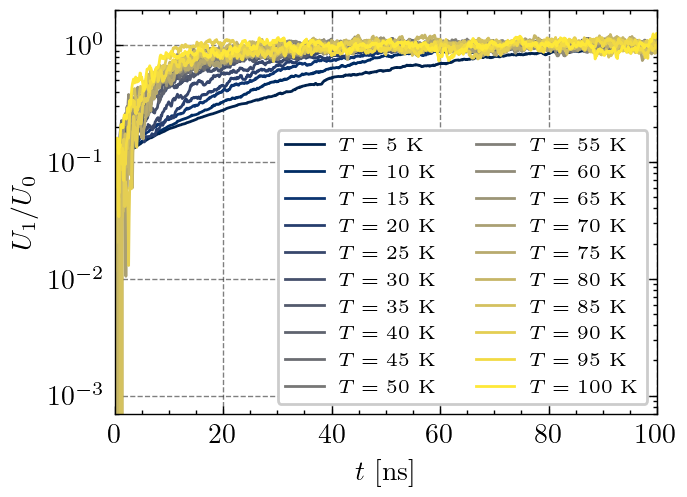

In [9]:
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
norm    = Normalize(vmin=T_vals[0], vmax=T_vals[-1])
for T in T_vals:
    ax.plot(t_vals, output_o[T]/U_0, label=f'$T = {T}$ K', color=cm(norm(T)))
ax.legend(fontsize='x-small', ncol=2)
ax.set_ylabel("$U_1/U_0$")
ax.set_xlabel("$t$ [ns]")
ax.set_xlim(0,100)
# ax.set_ylim(0.05,1.2)
ax.set_yscale('log')

## Potential Curves

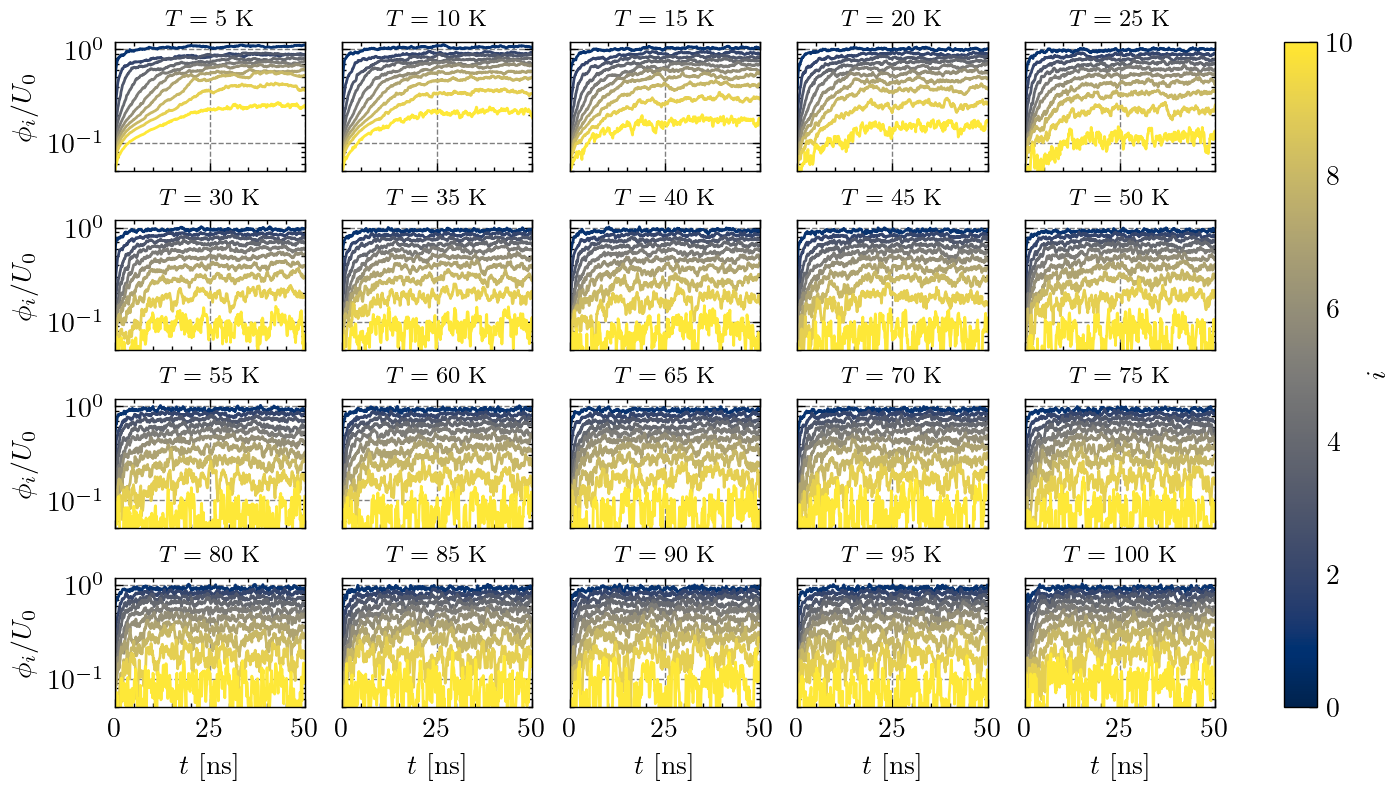

In [20]:
fig     = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
fig.set_figheight(fig.get_figheight()*1.5)
norm    = Normalize(vmin=0, vmax=10)
all_ax  = []

for n, T in enumerate(T_vals):
    ax = fig.add_subplot(4,5,n+1)
    all_ax.append(ax)
    for i in range(1,N_p+1):
        ax.plot(t_vals, pot_closed[T][i].values/U_0, color=cm(norm(i)))
    ax.set_title(f"$T = {T}$ K", fontsize='small')
    ax.set_xlim(0,50)
    ax.set_ylim(0.05,1.2)
    ax.set_yscale('log')
    
    if n % 5 == 0:
        ax.set_ylabel("$\phi_i / U_0$")
    else:
        ax.set_yticklabels("")
    if n >= 15:
        ax.set_xlabel("$t$ [ns]")
    else:
        ax.set_xticklabels("")

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$i$")

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

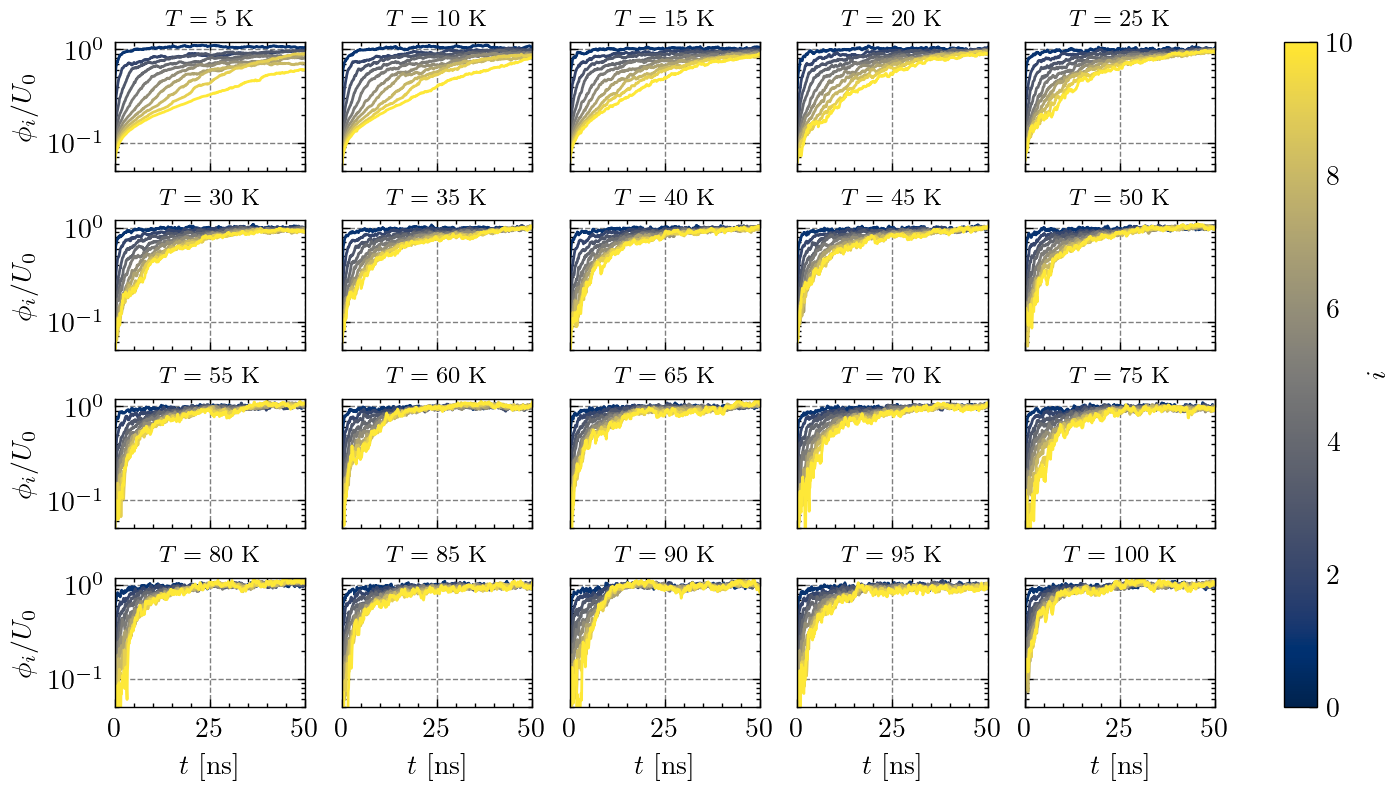

In [21]:
fig     = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
fig.set_figheight(fig.get_figheight()*1.5)
norm    = Normalize(vmin=0, vmax=10)
all_ax  = []

for n, T in enumerate(T_vals):
    ax = fig.add_subplot(4,5,n+1)
    all_ax.append(ax)
    for i in range(1,N_p+1):
        ax.plot(t_vals, pot_open[T][i].values/U_0, color=cm(norm(i)))
    ax.set_title(f"$T = {T}$ K", fontsize='small')
    ax.set_xlim(0,50)
    ax.set_ylim(0.05,1.2)
    ax.set_yscale('log')
    
    if n % 5 == 0:
        ax.set_ylabel("$\phi_i / U_0$")
    else:
        ax.set_yticklabels("")
    if n >= 15:
        ax.set_xlabel("$t$ [ns]")
    else:
        ax.set_xticklabels("")

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$i$")

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

## Potential Correlation

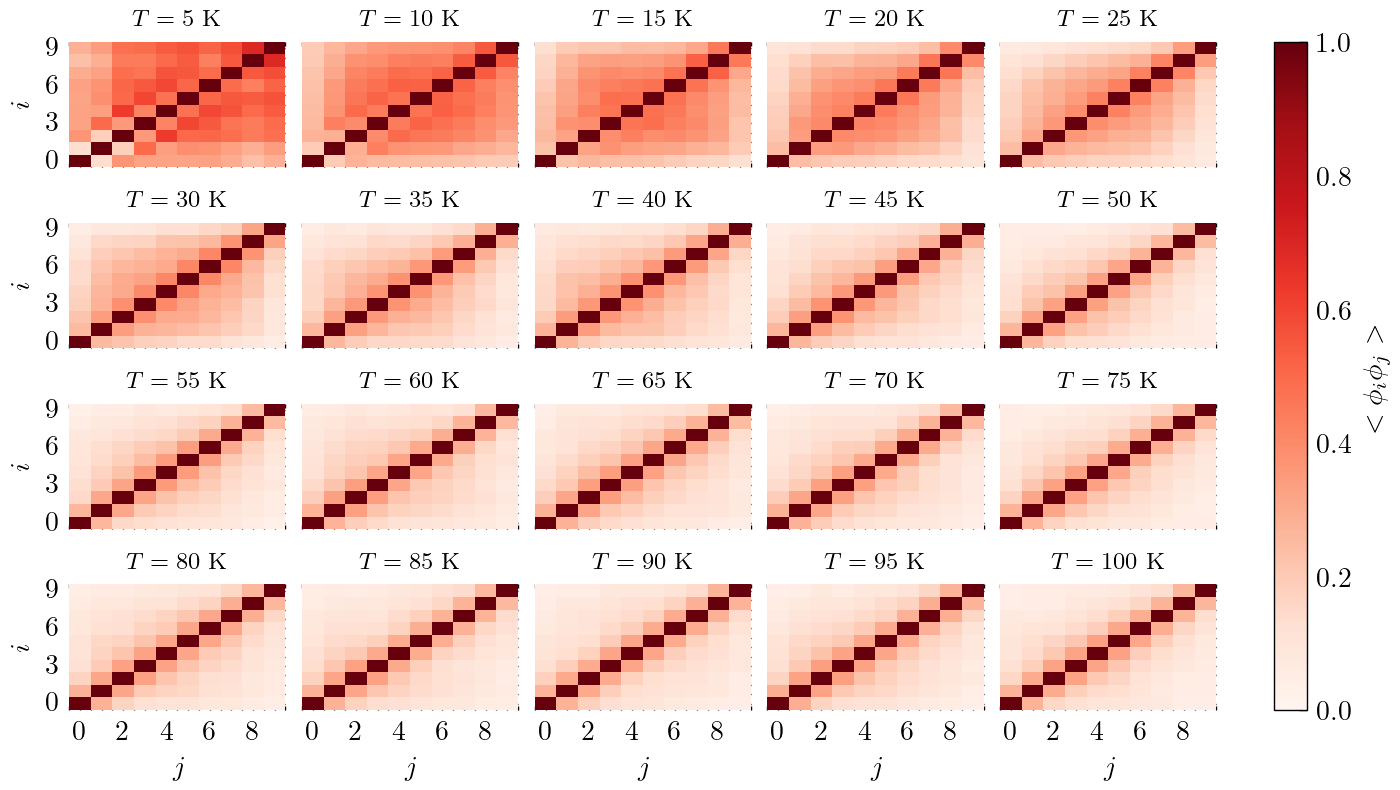

In [24]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
fig.set_figheight(fig.get_figheight()*1.5)
all_ax  = []
norm    = Normalize(vmin=0, vmax=1)

for n, T in enumerate(T_vals):

    ax = fig.add_subplot(4,5,n+1)
    df = pd.DataFrame(pot_closed[T].drop(columns=[0,11]).values)
    ax = sns.heatmap(df.corr(), cmap='Reds', vmin=0, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 15:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$T = {T}$ K", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\phi_{i}\phi_{j}>$")

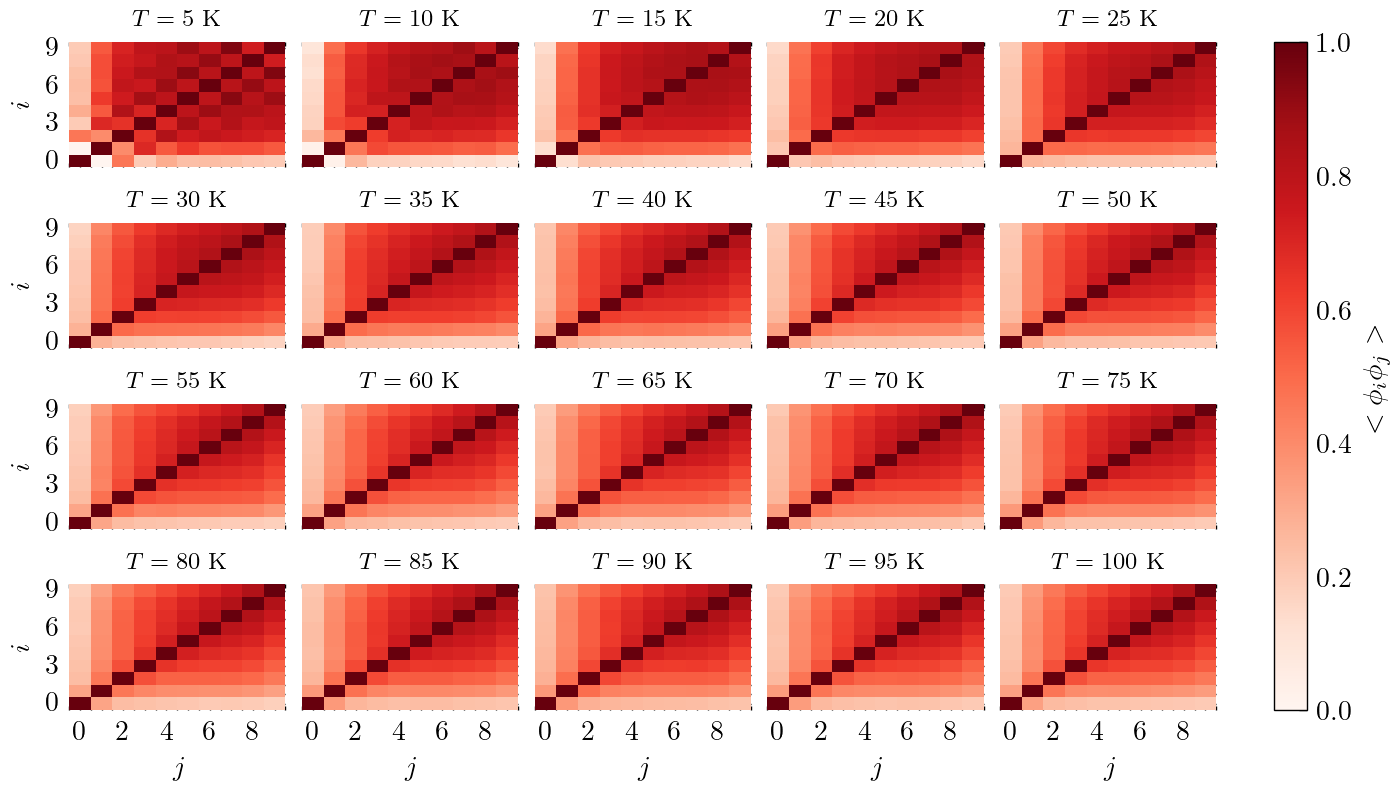

In [26]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
fig.set_figheight(fig.get_figheight()*1.5)
all_ax  = []
norm    = Normalize(vmin=0, vmax=1)

for n, T in enumerate(T_vals):

    ax = fig.add_subplot(4,5,n+1)
    df = pd.DataFrame(pot_open[T].drop(columns=[0,11]).values)
    ax = sns.heatmap(df.corr(), cmap='Reds', vmin=0, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 15:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$T = {T}$ K", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\phi_{i}\phi_{j}>$")

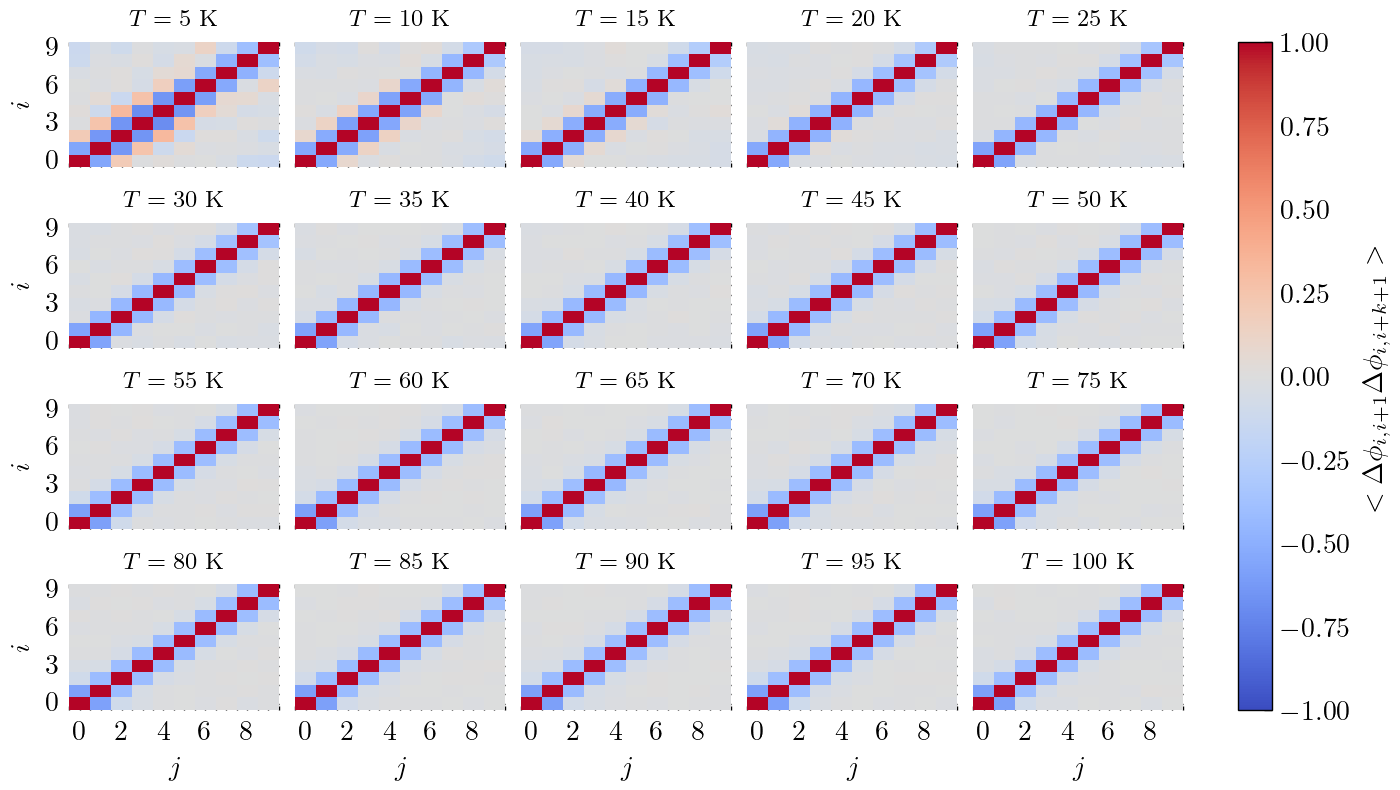

In [30]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
fig.set_figheight(fig.get_figheight()*1.5)
all_ax  = []
norm    = Normalize(vmin=-1, vmax=1)

for n, T in enumerate(T_vals):

    ax = fig.add_subplot(4,5,n+1)
    df = pd.DataFrame(pot_closed[T].diff(axis=1).drop(columns=[0,11]).values)
    ax = sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 15:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$T = {T}$ K", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\Delta\phi_{i,i+1}\Delta\phi_{i,i+k+1}>$")

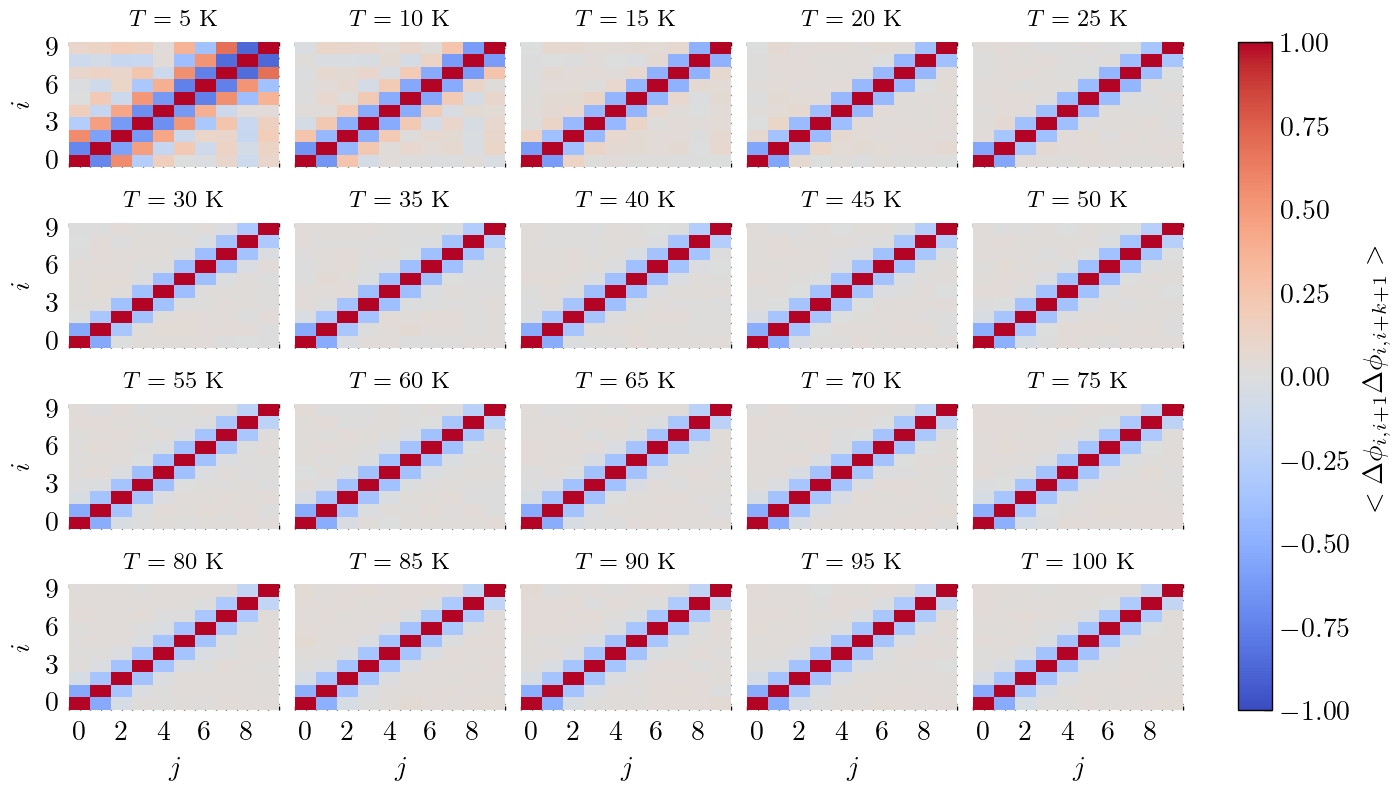

In [31]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
fig.set_figheight(fig.get_figheight()*1.5)
all_ax  = []
norm    = Normalize(vmin=-1, vmax=1)

for n, T in enumerate(T_vals):

    ax = fig.add_subplot(4,5,n+1)
    df = pd.DataFrame(pot_open[T].diff(axis=1).drop(columns=[0,11]).values)
    ax = sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 15:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$T = {T}$ K", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\Delta\phi_{i,i+1}\Delta\phi_{i,i+k+1}>$")

## Characteristic Time Scale @ Potentials

In [60]:
p_vals_c, cov_vals_c = {}, {}
p0, p1 = 0.2, 0.9
for T in T_vals:
    p_tmp, cov_tmp = [], []
    for k in range(1, N_p+1):

        x       = t_vals.copy()
        y       = pot_closed[T].loc[:,k].values
        y_max   = np.mean(y[-10000:])
        def func(t, tau, a0):
            return y_max - a0*np.exp(-t/tau)
        
        t0      = np.argmax(y>p0*y_max)
        t1      = np.argmax(y>p1*y_max)
        x_fit   = x.copy()[t0:t1]
        y_fit   = y.copy()[t0:t1]
        p, cov  = curve_fit(func, x_fit, y_fit, p0=[20,y_max], bounds=((0,0),(np.inf,np.inf)))

        p_tmp.append(p)
        cov_tmp.append(cov)
    p_vals_c[T] = np.array(p_tmp)
    cov_vals_c[T] = np.array(cov_tmp)

/tmp/ipykernel_9286/1658167337.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  p, cov  = curve_fit(func, x_fit, y_fit, p0=[20,y_max], bounds=((0,0),(np.inf,np.inf)))


(0.0, 50.0)

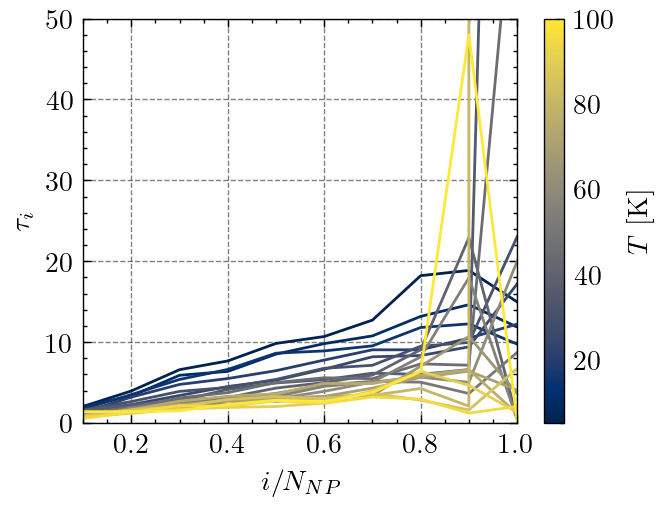

In [61]:
norm = Normalize(vmin=T_vals[0], vmax=T_vals[-1])

fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for T in T_vals:
    ax.plot(np.arange(1,N_p+1)/N_p, p_vals_c[T][:,0], color=cm(norm(T)))

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("$T$ [K]")

ax.set_ylabel("$\\tau_i$")
ax.set_xlabel("$i/N_{NP}$")
ax.set_xlim(0.1,1)
ax.set_ylim(0,50)

In [39]:
p_vals_o, cov_vals_o = {}, {}
p0, p1 = 0.2, 0.9
for T in T_vals:
    p_tmp, cov_tmp = [], []
    for k in range(1, N_p+1):

        x       = t_vals.copy()
        y       = pot_open[T].loc[:,k].values
        y_max   = np.mean(y[-10000:])
        def func(t, tau, a0):
            return y_max - a0*np.exp(-t/tau)
        
        t0      = np.argmax(y>p0*y_max)
        t1      = np.argmax(y>p1*y_max)
        x_fit   = x.copy()[t0:t1]
        y_fit   = y.copy()[t0:t1]
        p, cov  = curve_fit(func, x_fit, y_fit, p0=[20,y_max], bounds=((0,0),(np.inf,np.inf)))

        p_tmp.append(p)
        cov_tmp.append(cov)
    p_vals_o[T] = np.array(p_tmp)
    cov_vals_o[T] = np.array(cov_tmp)

(0.1, 1.0)

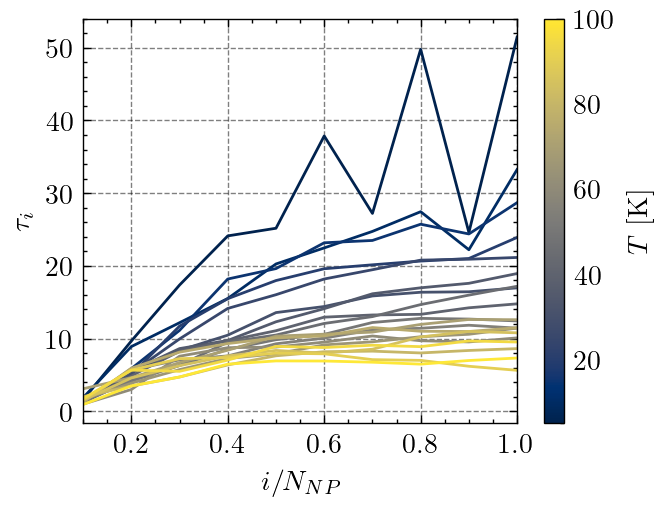

In [40]:
norm = Normalize(vmin=T_vals[0], vmax=T_vals[-1])

fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for T in T_vals:
    ax.plot(np.arange(1,N_p+1)/N_p, p_vals_o[T][:,0], color=cm(norm(T)))

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("$T$ [K]")

ax.set_ylabel("$\\tau_i$")
ax.set_xlabel("$i/N_{NP}$")
ax.set_xlim(0.1,1)

## Characteristic Time Scale @ Output

In [44]:
p_vals_c, cov_vals_c = [], []
p0, p1 = 0.2, 0.9
for T in T_vals:

    x       = t_vals.copy()
    y       = output_c[T]
    y_max   = np.mean(y[-5000:])
    def func(t, tau, a0):
        return y_max - a0*np.exp(-t/tau)
    
    t0      = np.argmax(y>p0*y_max)
    t1      = np.argmax(y>p1*y_max)
    x_fit   = x.copy()[t0:t1]
    y_fit   = y.copy()[t0:t1]
    p, cov  = curve_fit(func, x_fit, y_fit, p0=[5,y_max], bounds=((0,0),(np.inf,np.inf)))

    p_vals_c.append(p)
    cov_vals_c.append(cov)
p_vals_c = np.array(p_vals_c)
cov_vals_c = np.array(cov_vals_c)

/tmp/ipykernel_9286/1562930478.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  p, cov  = curve_fit(func, x_fit, y_fit, p0=[5,y_max], bounds=((0,0),(np.inf,np.inf)))


(0.0, 50.0)

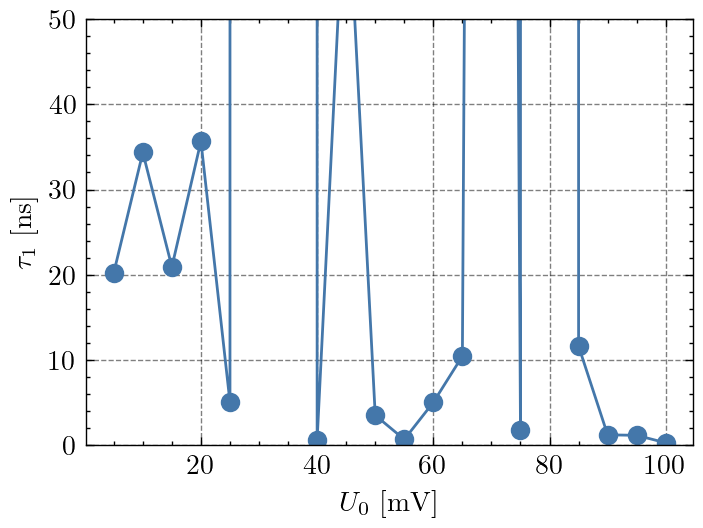

In [49]:
fig = plt.figure(dpi=200, layout='constrained')
ax  = fig.add_subplot()
ax.plot(np.array(T_vals), p_vals_c[:,0], 'o-')
ax.set_xlabel("$U_0$ [mV]")
ax.set_ylabel("$\\tau_1$ [ns]")
ax.set_ylim(0,50)

In [47]:
p_vals_o, cov_vals_o = [], []
p0, p1 = 0.2, 0.9
for T in T_vals:

    x       = t_vals.copy()
    y       = output_o[T]
    y_max   = np.mean(y[-5000:])
    def func(t, tau, a0):
        return y_max - a0*np.exp(-t/tau)
    
    t0      = np.argmax(y>p0*y_max)
    t1      = np.argmax(y>p1*y_max)
    x_fit   = x.copy()[t0:t1]
    y_fit   = y.copy()[t0:t1]
    p, cov  = curve_fit(func, x_fit, y_fit, p0=[5,y_max], bounds=((0,0),(np.inf,np.inf)))

    p_vals_o.append(p)
    cov_vals_o.append(cov)
p_vals_o = np.array(p_vals_o)
cov_vals_o = np.array(cov_vals_o)

Text(0, 0.5, '$\\tau_1$ [ns]')

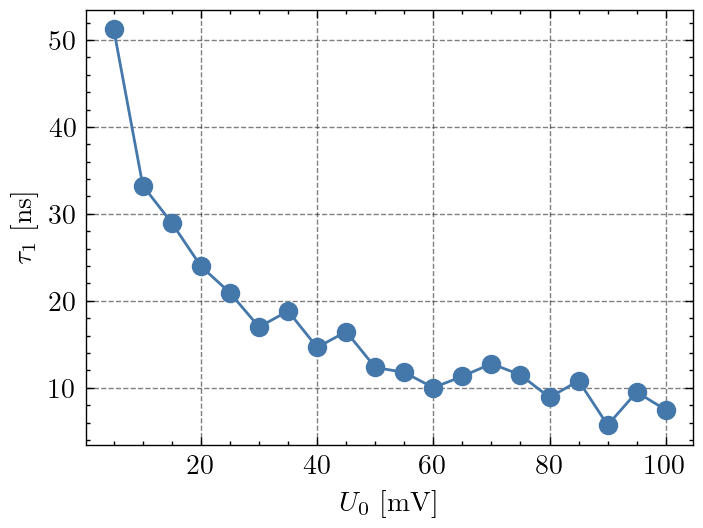

In [48]:
fig = plt.figure(dpi=200, layout='constrained')
ax  = fig.add_subplot()
ax.plot(np.array(T_vals), p_vals_o[:,0], 'o-')
ax.set_xlabel("$U_0$ [mV]")
ax.set_ylabel("$\\tau_1$ [ns]")